In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [33]:
df = pd.read_csv('../dataset/gaze_height_CHATTAHOOCHEE_02336000.csv')

In [34]:
len(df)/14

8766.142857142857

In [35]:
df = df[8760*12:]

In [36]:
toPlot

,Unnamed: 0,DATE,HourlyPrecipitation,gaze_height,DayOfYear,HourOfDay
113880,113880,2022-12-28 11:00:00,0.0,3.53,362,11
113881,113881,2022-12-28 12:00:00,0.0,3.29,362,12
113882,113882,2022-12-28 13:00:00,0.0,3.13,362,13
113883,113883,2022-12-28 14:00:00,0.0,3.03,362,14
113884,113884,2022-12-28 15:00:00,0.0,2.99,362,15
...,...,...,...,...,...,...
122721,122721,2023-12-31 19:00:00,0.0,3.08,365,19
122722,122722,2023-12-31 20:00:00,0.0,3.07,365,20
122723,122723,2023-12-31 21:00:00,0.0,3.06,365,21
122724,122724,2023-12-31 22:00:00,0.0,3.05,365,22


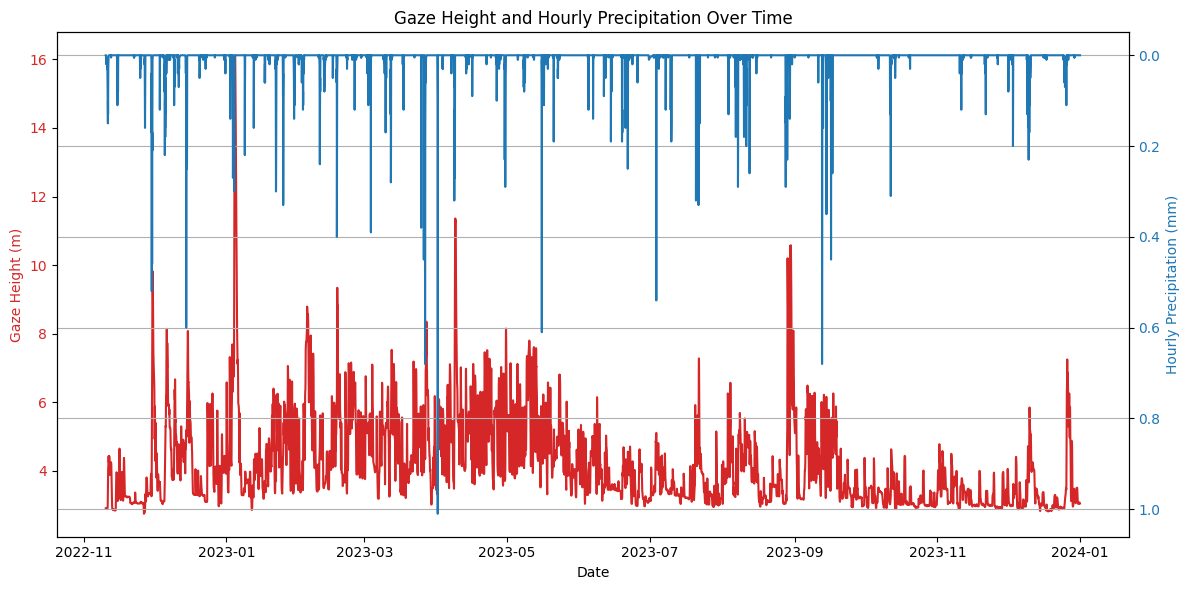

In [15]:
df = pd.read_csv('chattahoochee_1hr.csv')

# Parse 'DATE' if necessary and ensure it's the index, assuming it's already in a proper datetime format
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 'gaze_height' on the left y-axis
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Gaze Height (m)', color=color)
ax1.plot(df.index, df['gaze_height'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for 'HourlyPrecipitation'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Hourly Precipitation (mm)', color=color)
ax2.plot(df.index, df['Precip'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax2.invert_yaxis()

# Title and grid
plt.title('Gaze Height and Hourly Precipitation Over Time')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

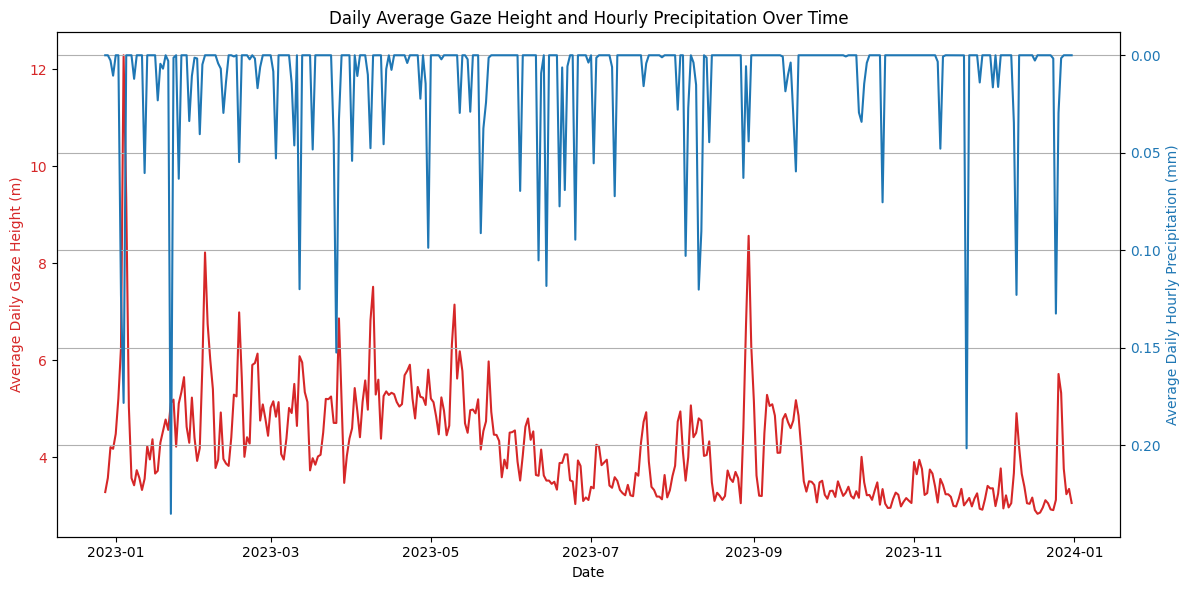

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('gaze_height_CHATTAHOOCHEE_02336000.csv')[13*8760:]
# Ensure 'DATE' is a datetime type and set it as the index
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

# Resample data to daily averages
daily_data = data.resample('D').mean()  # 'D' stands for daily

# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 'gaze_height' on the left y-axis
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Daily Gaze Height (m)', color=color)
ax1.plot(daily_data.index, daily_data['gaze_height'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for 'HourlyPrecipitation'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Average Daily Hourly Precipitation (mm)', color=color)
ax2.plot(daily_data.index, daily_data['HourlyPrecipitation'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Invert the y-axis of the Hourly Precipitation to plot on the ceiling
ax2.invert_yaxis()

# Title and grid
plt.title('Daily Average Gaze Height and Hourly Precipitation Over Time')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


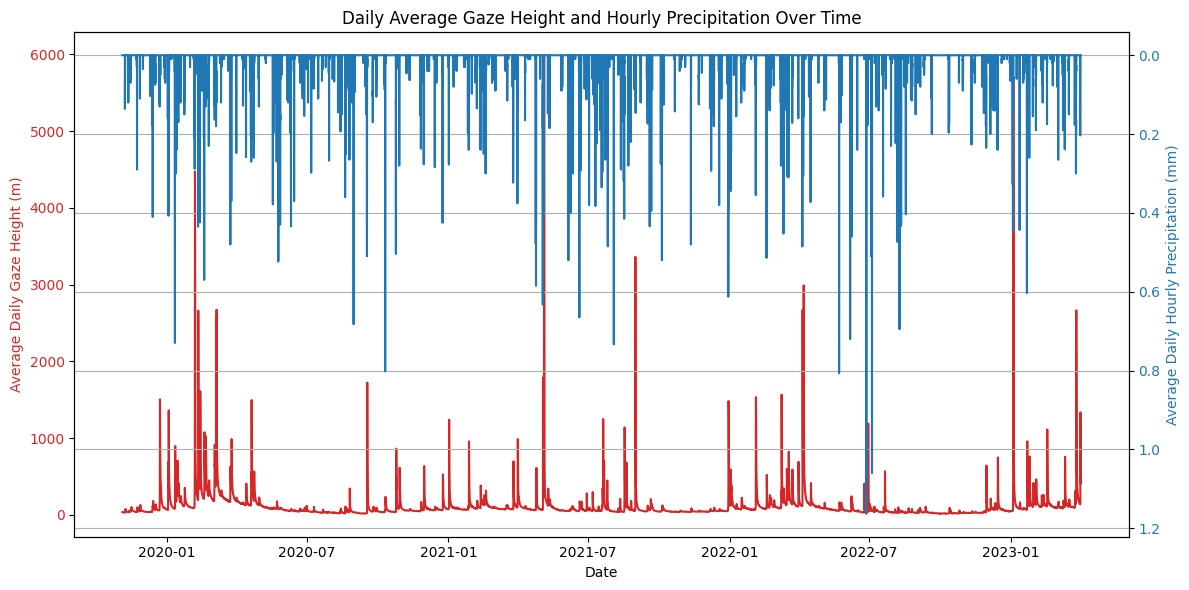

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('1Hour.csv', usecols=['Unnamed: 0', 'y', 'HourlyPrecipitation'])[12*8760:]
# Ensure 'DATE' is a datetime type and set it as the index
data['DATE'] = pd.to_datetime(data['Unnamed: 0'])


# If 'DATE' is not datetime, convert it
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')

# If there are any non-numeric columns for 'gaze_height' or 'HourlyPrecipitation', convert them
data['y'] = pd.to_numeric(data['y'], errors='coerce')
data['HourlyPrecipitation'] = pd.to_numeric(data['HourlyPrecipitation'], errors='coerce')

data.set_index('DATE', inplace=True)


# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 'gaze_height' on the left y-axis
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Daily Gaze Height (m)', color=color)
ax1.plot(data.index, data['y'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for 'HourlyPrecipitation'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Average Daily Hourly Precipitation (mm)', color=color)
ax2.plot(data.index, data['HourlyPrecipitation'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Invert the y-axis of the Hourly Precipitation to plot on the ceiling
ax2.invert_yaxis()

# Title and grid
plt.title('Daily Average Gaze Height and Hourly Precipitation Over Time')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


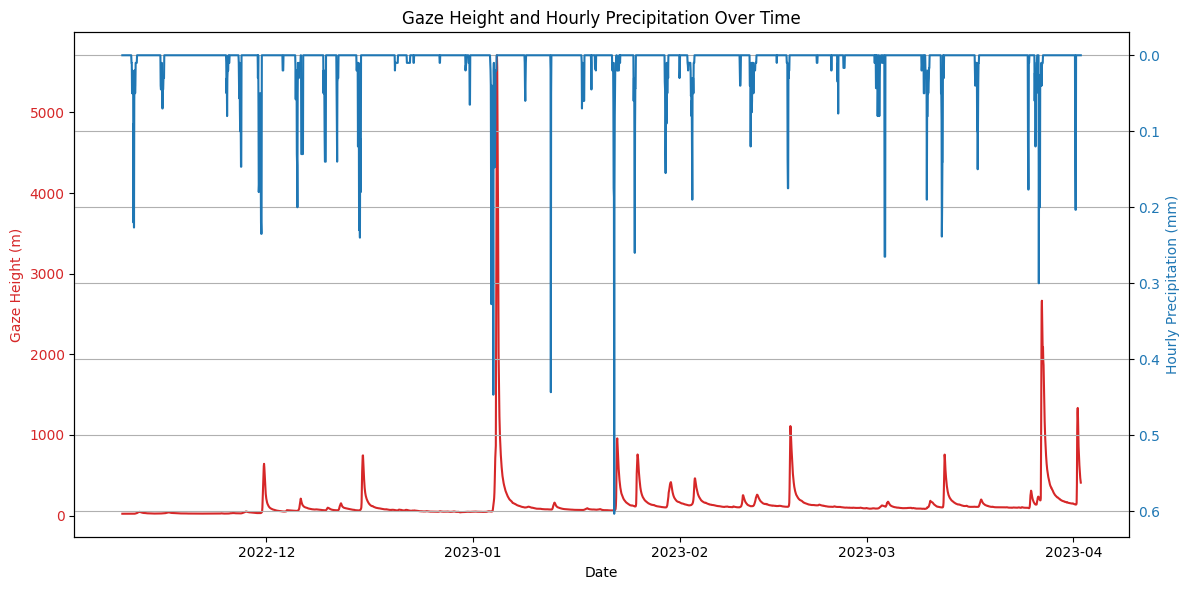

In [52]:
# Parse 'DATE' if necessary and ensure it's the index, assuming it's already in a proper datetime format

df = pd.read_csv('1Hour.csv')[15*8760:]

df['DATE'] = pd.to_datetime(df['Unnamed: 0'])
df.set_index('DATE', inplace=True)

# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 'gaze_height' on the left y-axis
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Gaze Height (m)', color=color)
ax1.plot(df.index, df['y'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for 'HourlyPrecipitation'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Hourly Precipitation (mm)', color=color)
ax2.plot(df.index, df['HourlyPrecipitation'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax2.invert_yaxis()

# Title and grid
plt.title('Gaze Height and Hourly Precipitation Over Time')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

/local_scratch/slurm.50870/ipykernel_2533689/3982491087.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


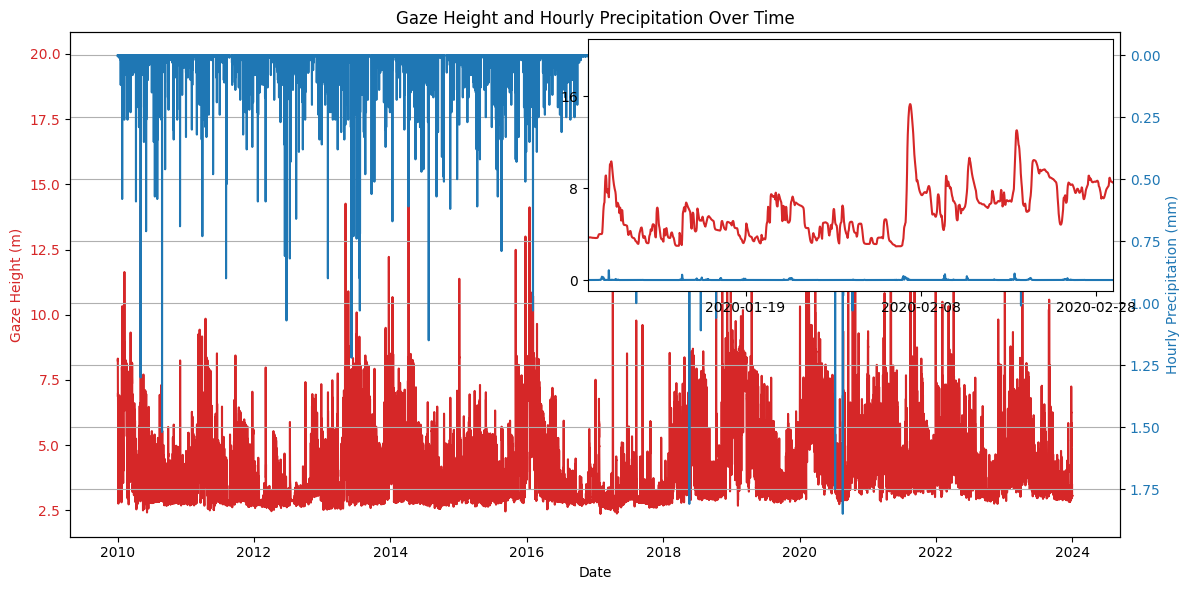

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Load and prepare the data
df = pd.read_csv('chattahoochee_1hr.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 'gaze_height' on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Gaze Height (m)', color='tab:red')
ax1.plot(df.index, df['gaze_height'], color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create a second y-axis for 'HourlyPrecipitation'
ax2 = ax1.twinx()
ax2.set_ylabel('Hourly Precipitation (mm)', color='tab:blue')
ax2.plot(df.index, df['Precip'], color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.invert_yaxis()

# Title and grid
plt.title('Gaze Height and Hourly Precipitation Over Time')
plt.grid(True)

# Adding an inset (zoomed area)
axins = inset_axes(ax1, width="50%", height="50%", loc='upper right')
axins.plot(df.index, df['gaze_height'], color='tab:red')
axins.plot(df.index, df['Precip'], color='tab:blue')

# Set the limits of the inset to the desired zoom range
start_date = pd.Timestamp('2020-01-01')  # specify your start date
end_date = pd.Timestamp('2020-03-01')  # specify your end date
axins.set_xlim(start_date, end_date)

# Optional: Add specific ticks for the inset if required
axins.xaxis.set_major_locator(plt.MaxNLocator(3))  # Adjust to taste
axins.yaxis.set_major_locator(plt.MaxNLocator(3))  # Adjust to taste

plt.tight_layout()
plt.show()


/var/folders/j3/9_pszf256zvgnry9z0x72k_h0000gn/T/ipykernel_29722/3653153064.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


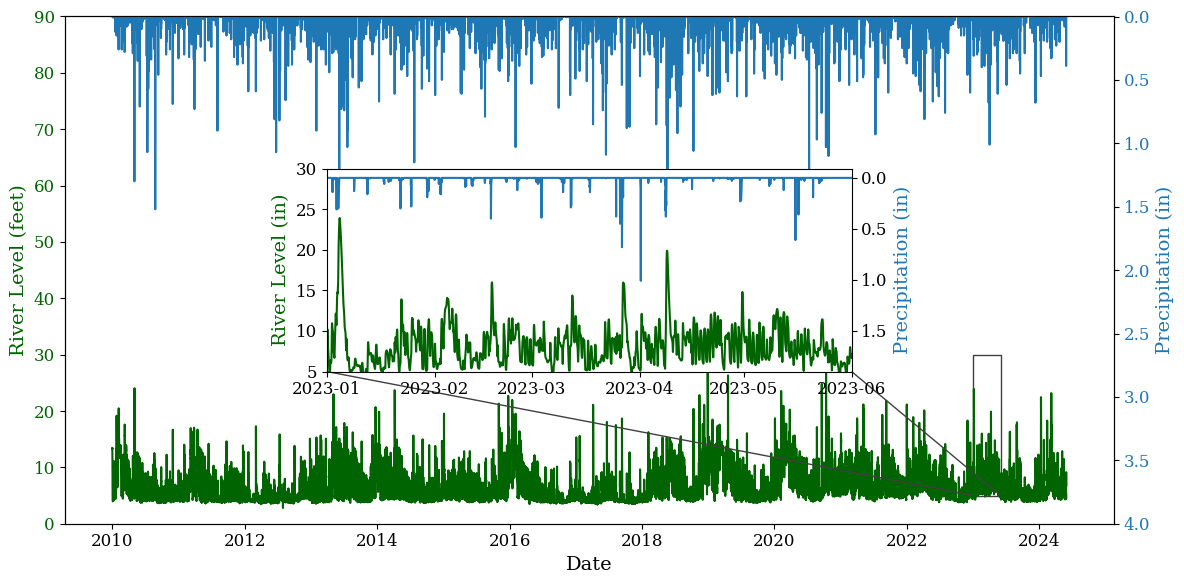

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Load and prepare the data
df = pd.read_csv('chattahoochee_1hr_02336490.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

gren = '#006400'
ornge = '#F56600'
blu = '#0022ff'
pur = '#800080'

# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12  # Increase base font size
plt.rcParams['font.weight'] = 'normal'

# Plot 'gaze_height' on the left y-axis
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('River Level (feet)', color=gren, fontsize=14)
ax1.plot(df.index, df['gaze_height'], color=gren)
ax1.tick_params(axis='y', labelcolor=gren)
ax1.set_ylim(0, 90)

# Create a second y-axis for 'HourlyPrecipitation'
ax2 = ax1.twinx()
ax2.set_ylabel('Precipitation (in)', color='tab:blue', fontsize=14)
ax2.plot(df.index, df['Precip'], color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylim(0, 4.0)
ax2.invert_yaxis()

# Title and grid
plt.grid(False)

# Adding an inset (zoomed area)
axins1 = inset_axes(ax1, width="50%", height="40%", loc='center')
axins1.plot(df.index, df['gaze_height'], color=gren)
axins1.set_ylabel('River Level (in)', color =gren, fontsize=14)

axins2 = axins1.twinx()
axins2.plot(df.index, df['Precip'], color='tab:blue')
axins2.set_ylabel('Precipitation (in)', color = 'tab:blue', fontsize=14)

axins2.invert_yaxis()

ax1.set_ylim(0, ax1.get_ylim()[1])  # Ensures that the y-axis starts at 0
#axins.set_ylim(min_value, max_value)  # Define these based on your zoomed data range


# Set zoomed range on the inset and the locations of mark_inset
start_date = pd.Timestamp('2023-01-01')  # Adjust date to match your dataset
end_date = pd.Timestamp('2023-06-01')  # Adjust date to match your dataset
axins1.set_xlim(start_date, end_date)

# Optionally adjust the y-limits manually to better fit the zoomed-in view
axins1.set_ylim(5, 30)  # Example y-limits, adjust based on your data range

# Apply mark_inset to show the bounds of the inset on the main plot
mark_inset(ax1, axins1, loc1=3, loc2=4, fc="none", ec="0.25")  # Try adjusting loc1 and loc2 here

plt.tight_layout()
plt.savefig('plot_results/gauge_height_precip_over_time.png', dpi=300)
plt.show()


In [29]:
# calculate concentration time
# find average positive time between peak rainfall and peak gaze height before gaze height starts dropping again

import pandas as pd

# Load data
data_path = 'chattahoochee_1hr_02336490.csv'  # Adjust this to your actual data file path
df = pd.read_csv(data_path)
df['DATE'] = pd.to_datetime(df['DATE'])  # Ensure 'Date' is in datetime format


import numpy as np
from scipy.signal import find_peaks

def find_local_maxima(series):
    # Find indices of local maxima
    peaks, _ = find_peaks(series)
    return peaks

def calculate_concentration_time(df):
    # Convert Precip and GaugeHeight to numeric if not already
    df['Precip'] = pd.to_numeric(df['Precip'], errors='coerce')
    df['gaze_height'] = pd.to_numeric(df['gaze_height'], errors='coerce')

    # Find local maxima for Precip and GaugeHeight
    precip_peaks_indices = find_local_maxima(df['Precip'])
    height_peaks_indices = find_local_maxima(df['gaze_height'])

    # Filter peaks for significant rainfall (e.g., at least 0.2 inches)
    significant_precip_peaks = precip_peaks_indices[df['Precip'].iloc[precip_peaks_indices] >= 0.2]

    concentration_times = []

    # Loop through each significant precipitation peak
    for precip_index in significant_precip_peaks:
        peak_precip_time = df.iloc[precip_index]['DATE']

        # Find the first gauge height peak that occurs after the rainfall peak
        subsequent_height_peaks = height_peaks_indices[height_peaks_indices > precip_index]

        if len(subsequent_height_peaks) > 0:
            # Get the first subsequent gauge height peak
            first_height_peak_index = subsequent_height_peaks[0]
            peak_height_time = df.iloc[first_height_peak_index]['DATE']

            # Calculate concentration time
            concentration_time = peak_height_time - peak_precip_time
            concentration_times.append(concentration_time.total_seconds() / 3600)  # Convert to hours

    return concentration_times


# Calculate concentration times
all_concentration_times = calculate_concentration_time(df)

# Calculate average if there are valid concentration times
if all_concentration_times:
    average_concentration_time = sum(all_concentration_times) / len(all_concentration_times)
    print(f"Average Concentration Time: {average_concentration_time} hours")
else:
    print("No valid concentration times found.")


Average Concentration Time: 8.109207708779444 hours


In [30]:
conc_time = 8.109
conc_time/.6

13.515

In [ ]:
#conc time  = 11.06 hours

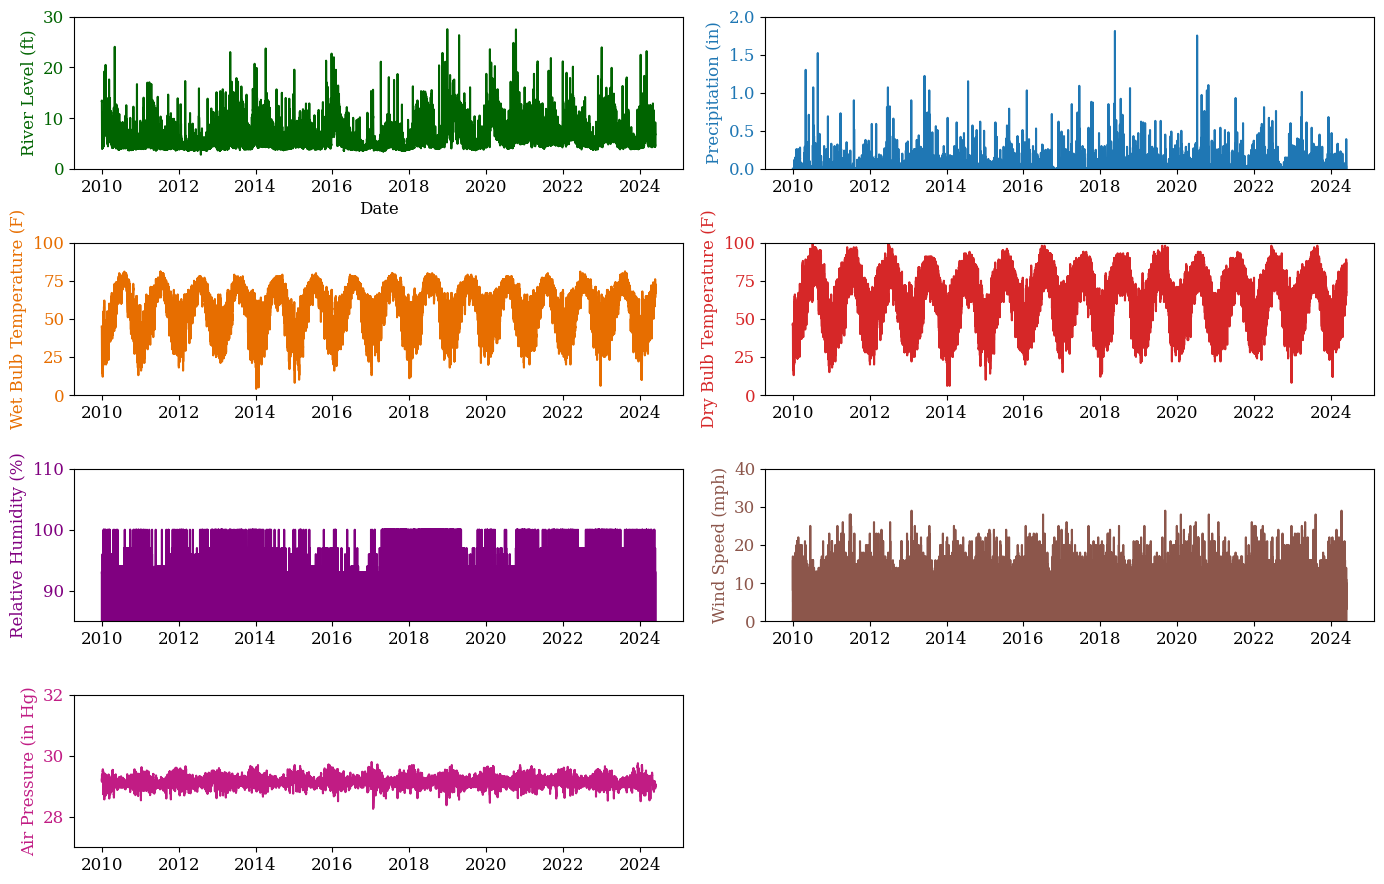

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Load and prepare the data
df = pd.read_csv('chattahoochee_1hr_02336490.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12  # Increase base font size
plt.rcParams['font.weight'] = 'normal'

gren = '#006400'
ornge = '#E76E00'
blu = '#0022ff'
pur = '#800080'
pink = '#C11C84'

# Create a plot with two y-axes
fig, ax1 = plt.subplots(nrows  = 4, ncols=2, figsize = (14,9))

# Plot 'gaze_height' on the left y-axis
ax1[0][0].set_xlabel('Date')
ax1[0][0].set_ylabel('River Level (ft)', color=gren)
ax1[0][0].plot(df.index, df['gaze_height'], color=gren)
ax1[0][0].tick_params(axis='y', labelcolor=gren)
ax1[0][0].set_ylim(0, 30)

# Create a second y-axis for 'HourlyPrecipitation'
ax1[0][1].set_ylabel('Precipitation (in)', color='tab:blue')
ax1[0][1].plot(df.index, df['Precip'], color='tab:blue')
ax1[0][1].tick_params(axis='y', labelcolor='tab:blue')
ax1[0][1].set_ylim(0, 2.0)

ax1[1][0].set_ylabel('Wet Bulb Temperature (F)', color=ornge)
ax1[1][0].plot(df.index, df['WetBulbTemp'], color=ornge)
ax1[1][0].tick_params(axis='y', labelcolor=ornge)
ax1[1][0].set_ylim(0, 100)

ax1[1][1].set_ylabel('Dry Bulb Temperature (F)', color='tab:red')
ax1[1][1].plot(df.index, df['DryBulbTemp'], color='tab:red')
ax1[1][1].tick_params(axis='y', labelcolor='tab:red')
ax1[1][1].set_ylim(0, 100)

ax1[2][0].set_ylabel('Relative Humidity (%)', color=pur)
ax1[2][0].plot(df.index, df['RelHumidity'], color=pur)
ax1[2][0].tick_params(axis='y', labelcolor=pur)
ax1[2][0].set_ylim(85, 110)

ax1[2][1].set_ylabel('Wind Speed (mph)', color='tab:brown')
ax1[2][1].plot(df.index, df['WindSpeed'], color='tab:brown')
ax1[2][1].tick_params(axis='y', labelcolor='tab:brown')
ax1[2][1].set_ylim(0, 40)

ax1[3][0].set_ylabel('Air Pressure (in Hg)', color=pink)
ax1[3][0].plot(df.index, df['Stationpressure'], color=pink)
ax1[3][0].tick_params(axis='y', labelcolor=pink)
ax1[3][0].set_ylim(27, 32)

fig.delaxes(ax1[3][1])


# Title and grid
plt.grid(False)

plt.tight_layout()
plt.savefig('plot_results/data_over_time.png', dpi=300)

plt.show()


In [10]:
df

,WetBulbTemp,DryBulbTemp,Precip,RelHumidity,WindSpeed,Stationpressure,gaze_height
DATE,,,,,,,
2010-01-01 00:00:00,44.0,45.0,0.0,93.0,7.0,28.95,8.25
2010-01-01 01:00:00,44.0,45.0,0.0,93.0,9.0,28.94,8.22
2010-01-01 02:00:00,44.0,45.0,0.0,94.0,10.0,28.95,8.20
2010-01-01 03:00:00,43.0,45.0,0.0,87.0,9.0,28.95,8.16
2010-01-01 04:00:00,41.0,43.0,0.0,87.0,7.0,28.93,8.14
...,...,...,...,...,...,...,...
2023-12-31 19:00:00,42.0,50.0,0.0,47.0,5.0,29.21,3.08
2023-12-31 20:00:00,39.0,47.0,0.0,54.0,3.0,29.21,3.07
2023-12-31 21:00:00,40.0,47.0,0.0,55.0,3.0,29.22,3.06
